# Flood Prediction with Regression

In [1]:
# Importing necessary libraries

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

### Dataset Description#### 
The dataet  was generated from a deep learning model trained on the Flood Prediction Factors dataset. Feature distributions are close to, but not exactly the same, as the originalThis part will help to load and give a overview of data like shape, describe , null values and duplicates values.
.

In [2]:
# Read and check the data
train_df = pd.read_csv('C:/Users/apple/Desktop/study/project/train.csv')
test_df = pd.read_csv('C:/Users/apple/Desktop/study/project/test.csv')
print("Duplicates: ",train_df.duplicated().sum(),"\n")
print("Null_values: ",train_df.isnull().sum(),"\n")
print("Shape: ", train_df.shape,"\n")
train_df.describe()
test_df.describe()

Duplicates:  0 

Null_values:  id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64 

Shape:  (1117957, 22) 



,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
count,7.453050e+05,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,...,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000,745305.000000
mean,1.490609e+06,4.915610,4.930288,4.960027,4.946084,4.938424,4.933524,4.958468,4.927651,4.945308,...,4.947436,4.944003,4.957209,4.927620,4.930720,4.926062,4.926957,4.948424,4.940204,4.943918
std,2.151512e+05,2.056295,2.094117,2.071722,2.052602,2.081816,2.059243,2.089312,2.068110,2.073404,...,2.081322,2.072335,2.088787,2.079006,2.083348,2.065638,2.073692,2.065891,2.079128,2.087387
min,1.117957e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304283e+06,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,1.490609e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1.676935e+06,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,1.863261e+06,16.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000,...,16.000000,17.000000,17.000000,16.000000,16.000000,17.000000,19.000000,22.000000,16.000000,16.000000


### EDA
#### Before creating the model, I will perform some exploratory data visualization, to get some insights on the data. We need to check the correlation with FloodProbability first.

In [3]:
train = train_df.drop(['id'], axis=1)
test = test_df.drop(['id'], axis=1)
# Correlation with FloodProbability  
corrmat = train.corr()
corrmat[['FloodProbability']].sort_values(by = 'FloodProbability', ascending=False)

,FloodProbability
FloodProbability,1.000000
DeterioratingInfrastructure,0.190007
MonsoonIntensity,0.189098
DamsQuality,0.187996
TopographyDrainage,0.187635
RiverManagement,0.187131
Siltation,0.186789
PopulationScore,0.185890
Landslides,0.185346
ClimateChange,0.184761


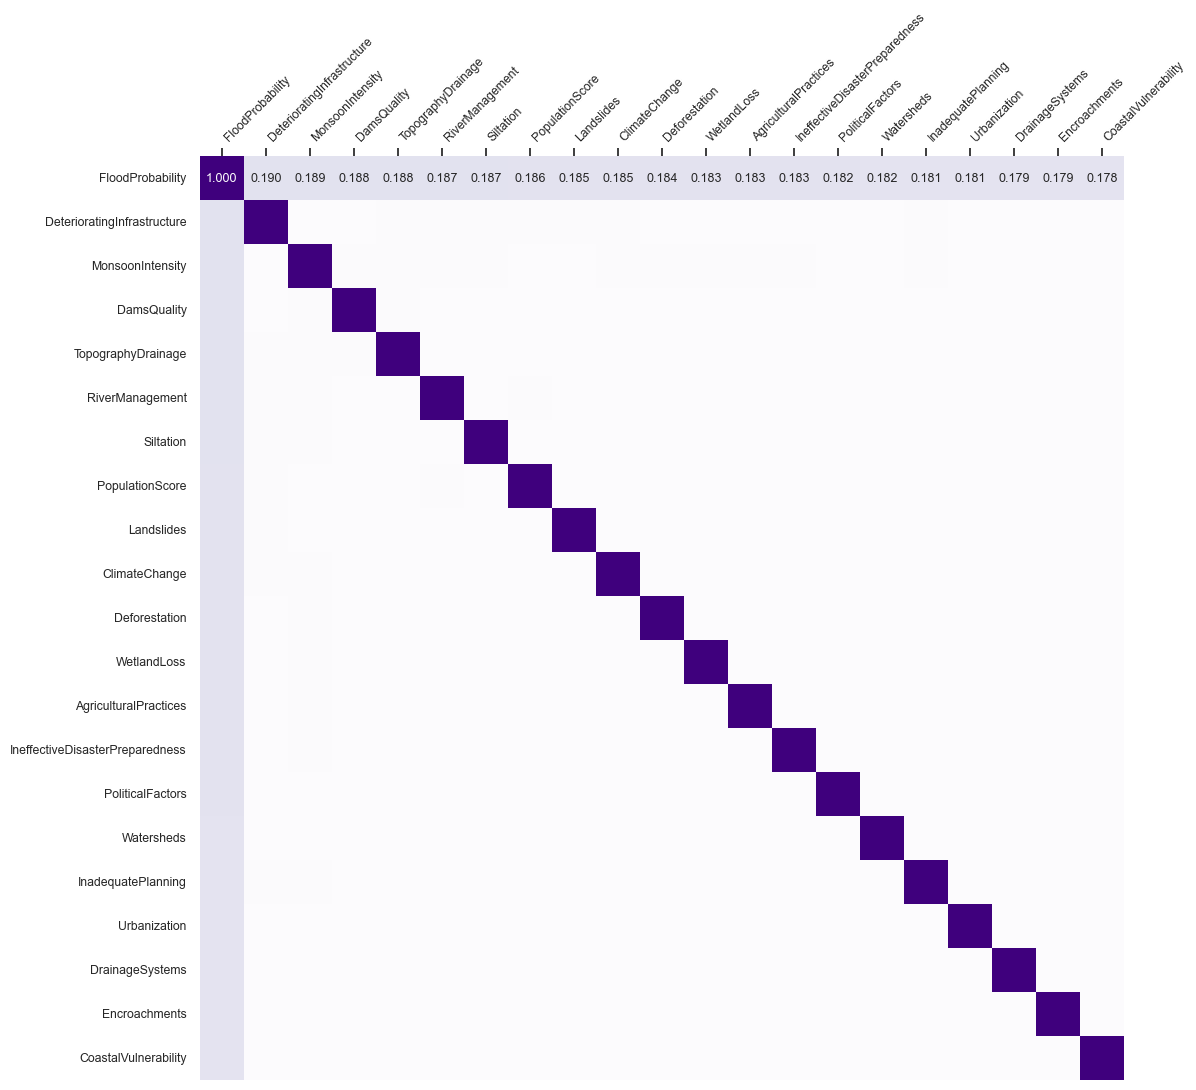

In [5]:
# correlation plot
plt.figure(figsize=(12, 12))
k=21
cols = corrmat.nlargest(k, 'FloodProbability')['FloodProbability'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.3f', annot_kws={'size': 9}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap="Purples")
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

#### The correlation matrix shows that there is no correlation among the features, but all features are correlated with the target. So we can analyse with all the features. Now, we see the distribution of the data with boxplot.

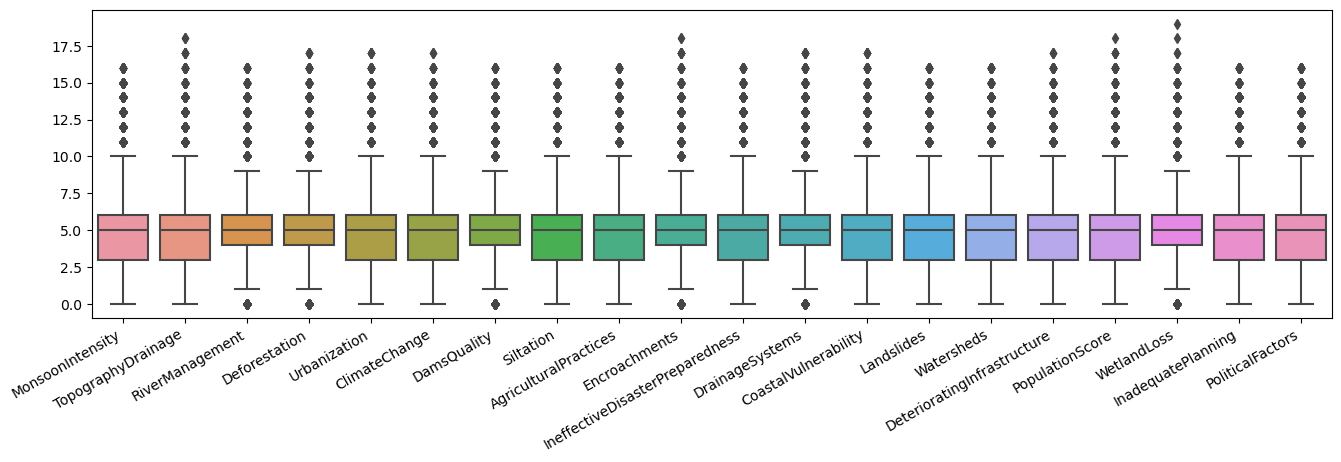

In [4]:
feature = train.drop(columns=['FloodProbability'],axis=1)
y = train[['FloodProbability']]
# boxplot
plt.figure(figsize=(16, 4))
plt.xticks(rotation=30, ha='right')
sns.boxplot(data = feature)
plt.show()

### Feature Engineering
#### From the boxplot, we can see that the distribution of every feature is different. Now we add some statistical features.

In [5]:
def add_features(data):
    data['mean_feat'] = data.mean(axis=1)
    data['max_feat'] = data.max(axis=1)
    data['min_feat'] = data.min(axis=1)
    data['median_feat'] = data.median(axis=1)
    data['std_feat'] = data.std(axis=1)
    return data
   
feature = add_features(feature)
feature.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,mean_feat,max_feat,min_feat,median_feat,std_feat
0,5,8,5,8,6,4,4,3,3,4,...,4,7,5,7,3,4.70,8.0,2.0,4.7,1.822146
1,6,7,4,4,8,8,3,5,4,6,...,5,3,3,4,3,4.70,9.0,0.0,4.0,2.477899
2,6,5,6,7,3,7,1,5,4,5,...,6,8,2,3,3,4.95,8.0,1.0,5.0,2.041178
3,3,4,6,5,4,8,4,7,6,8,...,4,6,5,7,5,5.20,8.0,2.0,5.0,1.735875
4,5,3,2,6,4,4,3,3,3,3,...,4,1,2,3,5,3.60,6.0,1.0,3.0,1.555542


In [6]:
feature = pd.concat([feature, y], axis=1)
feature.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,mean_feat,max_feat,min_feat,median_feat,std_feat,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,7,5,7,3,4.70,8.0,2.0,4.7,1.822146,0.445
1,6,7,4,4,8,8,3,5,4,6,...,3,3,4,3,4.70,9.0,0.0,4.0,2.477899,0.450
2,6,5,6,7,3,7,1,5,4,5,...,8,2,3,3,4.95,8.0,1.0,5.0,2.041178,0.530
3,3,4,6,5,4,8,4,7,6,8,...,6,5,7,5,5.20,8.0,2.0,5.0,1.735875,0.535
4,5,3,2,6,4,4,3,3,3,3,...,1,2,3,5,3.60,6.0,1.0,3.0,1.555542,0.415


## Train-test split

In [7]:
X = train.drop(columns=['FloodProbability'])
y = train['FloodProbability']

In [8]:
def feature_scaling(X):
    #Standarization- Plotting values on same scale
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    # Fit scaler on training data and transform both training and testing data
    X= scaler.fit_transform(X)

    return X
X= feature_scaling(X)

In [10]:
# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (894365, 20)
y_train shape: (894365,)
X_val shape: (223592, 20)
y_val shape: (223592,)


### Model Building

In [11]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

xgbr1 = xgb.XGBRegressor()

model_xgbr1 = xgbr1.fit(X_train, y_train)
model_xgbr1_pred = model_xgbr1.predict(X_val)
print('model_xgbr1 R2_Score: {0:.4f}'.format(r2_score(y_val, model_xgbr1_pred)))
print('model_xgbr1 MAE: {0:.4f}'.format(mean_absolute_error(y_val, model_xgbr1_pred)))
print('model_xgbr1 MSE: {0:.4f}'.format(mean_squared_error(y_val, model_xgbr1_pred)))

model_xgbr1 R2_Score: 0.8091
model_xgbr1 MAE: 0.0176
model_xgbr1 MSE: 0.0005


In [15]:
from lightgbm import LGBMRegressor

lgbmr1 = LGBMRegressor(verbose=-1)

model_lgbmr1 = lgbmr1.fit(X_train, y_train)
model_lgbmr1_pred = model_lgbmr1.predict(X_val)
print('model_lgbmr1 R2_Score: {0:.4f}'.format(r2_score(y_val, model_lgbmr1_pred)))
print('model_lgbmr1 MAE: {0:.4f}'.format(mean_absolute_error(y_val, model_lgbmr1_pred)))
print('model_lgbmr1 MSE: {0:.4f}'.format(mean_squared_error(y_val, model_lgbmr1_pred)))

model_lgbmr1 R2_Score: 0.7657
model_lgbmr1 MAE: 0.0201
model_lgbmr1 MSE: 0.0006


In [14]:
from catboost import CatBoostRegressor

cbr1 = CatBoostRegressor(verbose=0)

model_cbr1 = cbr1.fit(X_train, y_train)
model_cbr1_pred = model_cbr1.predict(X_val)
print('model_cbr1 R2_Score: {0:.4f}'.format(r2_score(y_val, model_cbr1_pred)))
print('model_cbr1 MAE: {0:.4f}'.format(mean_absolute_error(y_val, model_cbr1_pred)))
print('model_cbr1 MSE: {0:.4f}'.format(mean_squared_error(y_val, model_cbr1_pred)))

model_cbr1 R2_Score: 0.8462
model_cbr1 MAE: 0.0158
model_cbr1 MSE: 0.0004


In [16]:
# weight model blending
wmb1_pred = (model_xgbr1.predict(X_val)*3.3/10 + 
             model_lgbmr1.predict(X_val)*3.3/10 + 
             model_cbr1.predict(X_val)*3.4/10)
print('wmb1_pred R2_Score: {0:.4f}'.format(r2_score(y_val, wmb1_pred)))
print('wmb1_pred MAE: {0:.4f}'.format(mean_absolute_error(y_val, wmb1_pred)))
print('wmb1_pred MSE: {0:.4f}'.format(mean_squared_error(y_val, wmb1_pred)))

wmb1_pred R2_Score: 0.8310
wmb1_pred MAE: 0.0168
wmb1_pred MSE: 0.0004


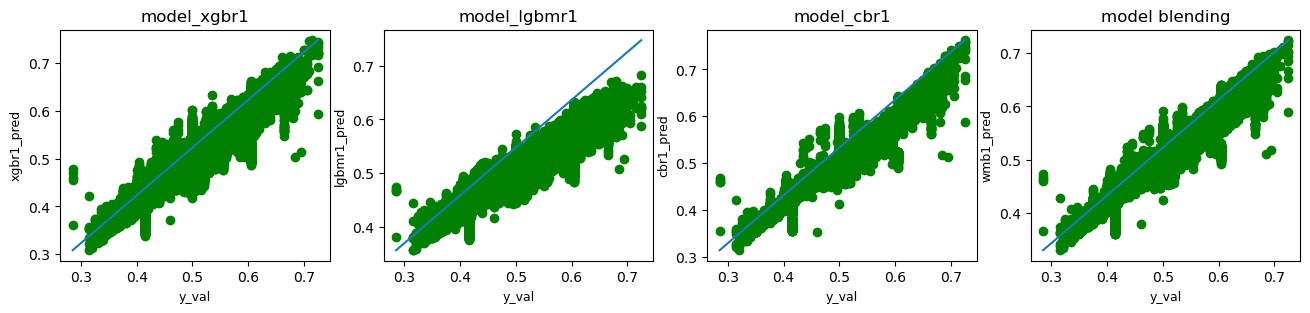

In [17]:
plt.figure(figsize=(16, 3))

plt.subplot(1, 4, 1)
plt.scatter(x = y_val, y = model_xgbr1_pred, color ='green')
plt.plot([y_val.min(), y_val.max()], [model_xgbr1_pred.min(), model_xgbr1_pred.max()])
plt.title('model_xgbr1')
plt.xlabel('y_val', fontsize = 9)
plt.ylabel('xgbr1_pred', fontsize = 9)

plt.subplot(1, 4, 2)
plt.scatter(x = y_val, y = model_lgbmr1_pred, color ='green')
plt.plot([y_val.min(), y_val.max()], [model_lgbmr1_pred.min(), model_xgbr1_pred.max()])
plt.title('model_lgbmr1')
plt.xlabel('y_val', fontsize = 9)
plt.ylabel('lgbmr1_pred', fontsize = 9)

plt.subplot(1, 4, 3)
plt.scatter(x = y_val, y = model_cbr1_pred, color ='green')
plt.plot([y_val.min(), y_val.max()], [model_cbr1_pred.min(), model_cbr1_pred.max()])
plt.title('model_cbr1')
plt.xlabel('y_val', fontsize = 9)
plt.ylabel('cbr1_pred', fontsize = 9)

plt.subplot(1, 4, 4)
plt.scatter(x = y_val, y = wmb1_pred, color ='green')
plt.plot([y_val.min(), y_val.max()], [wmb1_pred.min(), wmb1_pred.max()])
plt.title('model blending')
plt.xlabel('y_val', fontsize = 9)
plt.ylabel('wmb1_pred', fontsize = 9)

plt.show()

### Evaluation#### 
For the time being,model blendings wins.

In [18]:
pred_test = (model_xgbr1.predict(test)*3.3/10 + 
             model_lgbmr1.predict(test)*3.3/10 + 
             model_cbr1.predict(test)*3.4/10)
pred_test[:10]

array([0.91908452, 0.93201617, 0.89224732, 0.94124459, 0.92112932,
       0.92801405, 0.90025294, 0.93072002, 0.90433137, 0.93996416])